In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/mall customers.csv');df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.shape

(200, 5)

In [5]:
df.rename(columns={'Annual Income (k$)':'income','Spending Score (1-100)':'score'},inplace=True)

In [6]:
df.drop(['CustomerID'],axis=1,inplace=True)

In [7]:
df.Gender = df.Gender.replace(df.Gender.unique(),[0,1])

In [8]:
df.head()

,Gender,Age,income,score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


# Vizualization

In [9]:
import matplotlib.pyplot as plt

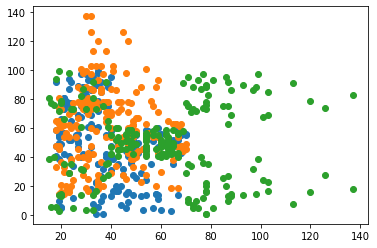

In [10]:
plt.scatter(df.Age,df.score)
plt.scatter(df.Age,df.income)
plt.scatter(df.income,df.score)

In [11]:
import seaborn as sns

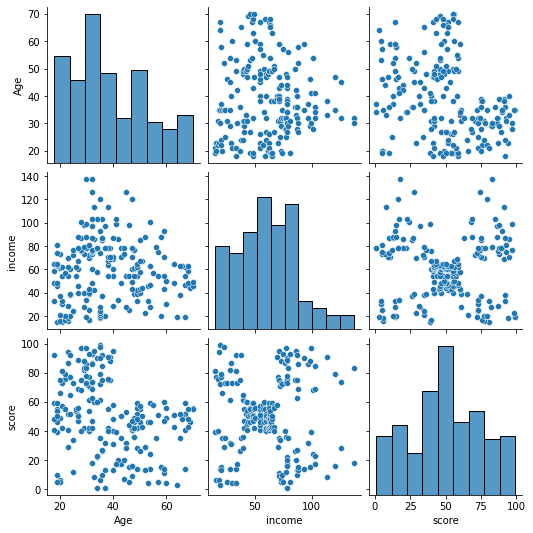

In [12]:
sns.pairplot(df[['Age','income','score']])

# KMeans

In [13]:
import sklearn.cluster as cluster

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans()

In [16]:
kmeans.fit(df[['Gender','Age','income','score']])

KMeans()

In [17]:
kmeans.labels_

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 0, 4, 7,
       1, 0, 4, 7, 7, 7, 4, 7, 7, 4, 4, 4, 4, 4, 7, 4, 4, 7, 4, 4, 4, 7,
       4, 4, 7, 7, 4, 4, 4, 4, 4, 7, 4, 7, 7, 4, 4, 7, 4, 4, 7, 4, 4, 7,
       7, 4, 4, 7, 4, 7, 7, 7, 4, 7, 4, 7, 7, 4, 4, 7, 4, 7, 4, 4, 4, 4,
       4, 7, 7, 7, 7, 7, 4, 4, 4, 4, 7, 7, 7, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       7, 2, 3, 2, 3, 2, 3, 2, 3, 2, 7, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 6])

In [18]:
kmeans.predict([[0,19,15,9]])

array([1])

In [19]:
df['clusters'] = kmeans.predict(df[['Gender','Age','income','score']])
df.head()

,Gender,Age,income,score,clusters
0,0,19,15,39,1
1,0,21,15,81,0
2,1,20,16,6,1
3,1,23,16,77,0
4,1,31,17,40,1


In [20]:
centers = kmeans.cluster_centers_
centers

array([[  0.59090909,  25.27272727,  25.72727273,  79.36363636],
       [  0.61904762,  44.14285714,  25.14285714,  19.52380952],
       [  0.53571429,  32.78571429,  78.03571429,  81.89285714],
       [  0.34615385,  41.23076923,  79.26923077,  15.92307692],
       [  0.55555556,  56.15555556,  53.37777778,  49.08888889],
       [  0.7       ,  41.        , 109.7       ,  22.        ],
       [  0.54545455,  32.45454545, 108.18181818,  82.72727273],
       [  0.64864865,  27.10810811,  56.2972973 ,  49.67567568]])

# Graph

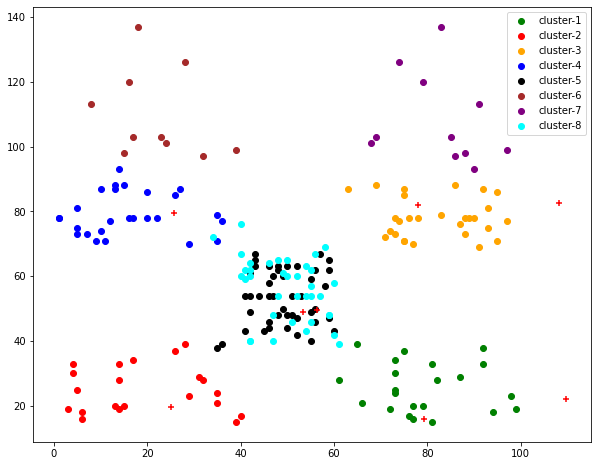

In [21]:
df1 = df[df.clusters == 0]
df2 = df[df.clusters == 1]
df3 = df[df.clusters == 2]
df4 = df[df.clusters == 3]
df5 = df[df.clusters == 4]
df6 = df[df.clusters == 5]
df7 = df[df.clusters == 6]
df8 = df[df.clusters == 7]

plt.figure(figsize=(10,8))

plt.scatter(df1['score'],df1['income'],color='green',label='cluster-1')
plt.scatter(df2['score'],df2['income'],color='red',label='cluster-2')
plt.scatter(df3['score'],df3['income'],color='orange',label='cluster-3')
plt.scatter(df4['score'],df4['income'],color='blue',label='cluster-4')
plt.scatter(df5['score'],df5['income'],color='black',label='cluster-5')
plt.scatter(df6['score'],df6['income'],color='brown',label='cluster-6')
plt.scatter(df7['score'],df7['income'],color='purple',label='cluster-7')
plt.scatter(df8['score'],df8['income'],color='cyan',label='cluster-8')

plt.scatter(centers[:,2], centers[:,3],color='red', marker='+')

plt.legend()

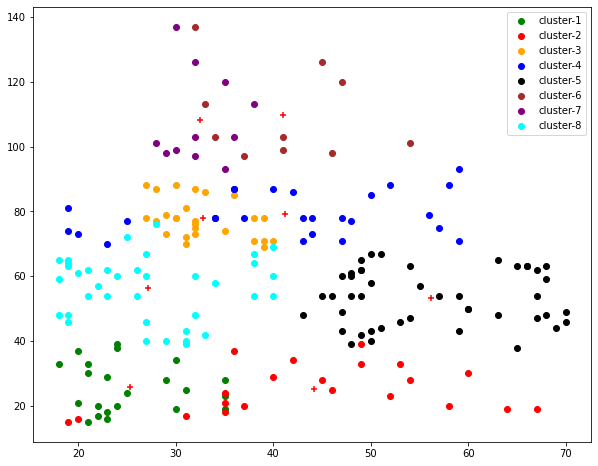

In [22]:
plt.figure(figsize=(10,8))

plt.scatter(df1['Age'],df1['income'],color='green',label='cluster-1')
plt.scatter(df2['Age'],df2['income'],color='red',label='cluster-2')
plt.scatter(df3['Age'],df3['income'],color='orange',label='cluster-3')
plt.scatter(df4['Age'],df4['income'],color='blue',label='cluster-4')
plt.scatter(df5['Age'],df5['income'],color='black',label='cluster-5')
plt.scatter(df6['Age'],df6['income'],color='brown',label='cluster-6')
plt.scatter(df7['Age'],df7['income'],color='purple',label='cluster-7')
plt.scatter(df8['Age'],df8['income'],color='cyan',label='cluster-8')

plt.scatter(centers[:,1], centers[:,2],color='red', marker='+')

plt.legend()

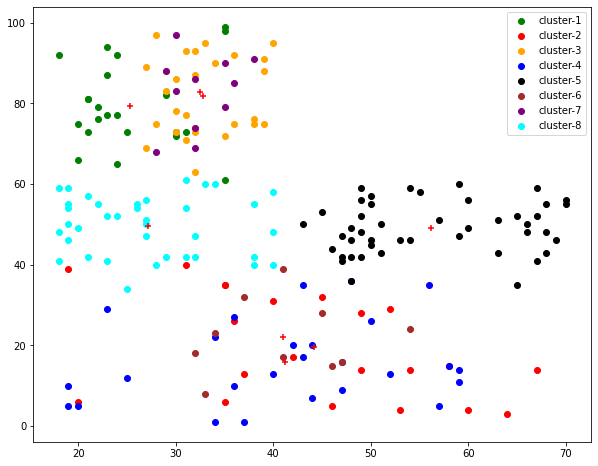

In [23]:
plt.figure(figsize=(10,8))

plt.scatter(df1['Age'],df1['score'],color='green',label='cluster-1')
plt.scatter(df2['Age'],df2['score'],color='red',label='cluster-2')
plt.scatter(df3['Age'],df3['score'],color='orange',label='cluster-3')
plt.scatter(df4['Age'],df4['score'],color='blue',label='cluster-4')
plt.scatter(df5['Age'],df5['score'],color='black',label='cluster-5')
plt.scatter(df6['Age'],df6['score'],color='brown',label='cluster-6')
plt.scatter(df7['Age'],df7['score'],color='purple',label='cluster-7')
plt.scatter(df8['Age'],df8['score'],color='cyan',label='cluster-8')

plt.scatter(centers[:,1], centers[:,3],color='red', marker='+')

plt.legend()

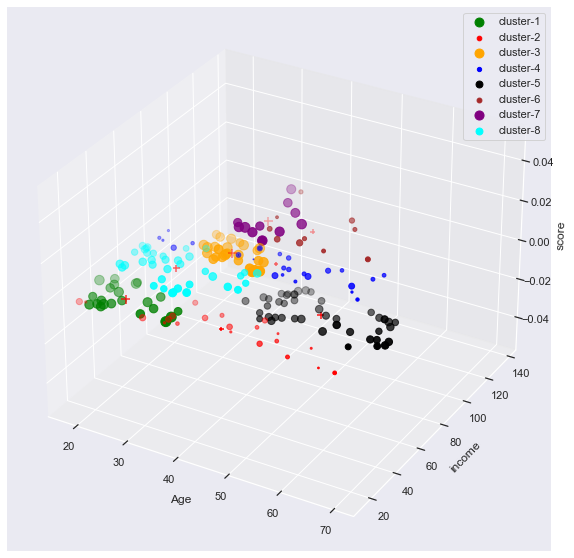

In [24]:


sns.set(style = "darkgrid")

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

plt.scatter(df1['Age'],df1['income'],df1['score'],color='green',label='cluster-1')
plt.scatter(df2['Age'],df2['income'],df2['score'],color='red',label='cluster-2')
plt.scatter(df3['Age'],df3['income'],df3['score'],color='orange',label='cluster-3')
plt.scatter(df4['Age'],df4['income'],df4['score'],color='blue',label='cluster-4')
plt.scatter(df5['Age'],df5['income'],df5['score'],color='black',label='cluster-5')
plt.scatter(df6['Age'],df6['income'],df6['score'],color='brown',label='cluster-6')
plt.scatter(df7['Age'],df7['income'],df7['score'],color='purple',label='cluster-7')
plt.scatter(df8['Age'],df8['income'],df8['score'],color='cyan',label='cluster-8')

ax.set_xlabel("Age")
ax.set_ylabel("income")
ax.set_zlabel("score")

plt.scatter(centers[:,1], centers[:,2], centers[:,3],color='red', marker='+')

plt.legend()

# optimizing cluster using Elbow Method

In [25]:
wcss = []
clusters = range(1,15)
for i in clusters:
    kmean = KMeans(n_clusters=i)
    kmean.fit(df[['Gender','Age','income','score']])
    wcss.append(kmean.inertia_)

### plot

Text(0, 0.5, 'Sum of squared error')

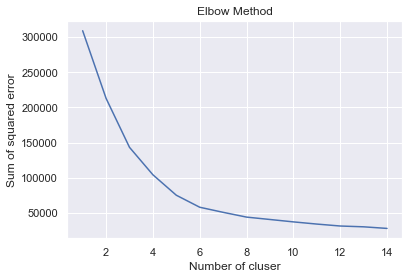

In [26]:
plt.plot(clusters,wcss)
plt.title('Elbow Method')
plt.xlabel('Number of cluser')
plt.ylabel('Sum of squared error')

# Knee locator

In [27]:
from kneed import KneeLocator

In [28]:
knee_locator = KneeLocator(clusters,wcss,curve='convex',direction = 'decreasing')

In [29]:
optimale_cluster = knee_locator.knee

In [30]:
optimale_cluster

5

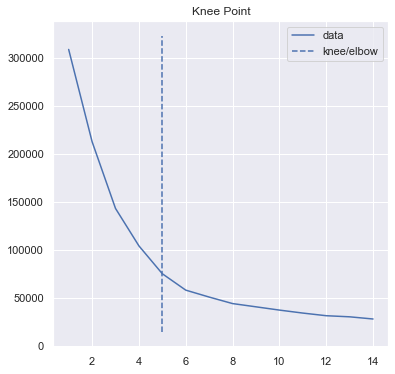

In [31]:
knee_locator.plot_knee()

# After tuning

In [32]:
kmeans = KMeans(n_clusters=5).fit(df[['Gender','Age','income','score']])

In [33]:
df['clusters'] = kmeans.predict(df[['Gender','Age','income','score']])
df.head()

,Gender,Age,income,score,clusters
0,0,19,15,39,3
1,0,21,15,81,0
2,1,20,16,6,3
3,1,23,16,77,0
4,1,31,17,40,3


In [34]:
centers = kmeans.cluster_centers_
centers

array([[ 0.59090909, 25.27272727, 25.72727273, 79.36363636],
       [ 0.47222222, 40.66666667, 87.75      , 17.58333333],
       [ 0.53846154, 32.69230769, 86.53846154, 82.12820513],
       [ 0.60869565, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.5875    , 42.9375    , 55.0875    , 49.7125    ]])

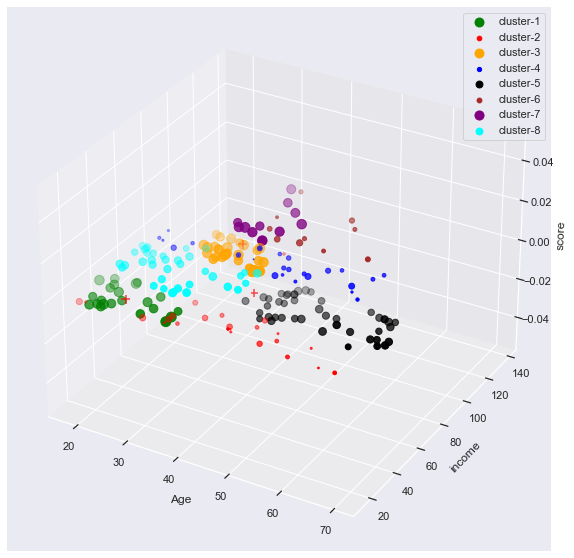

In [35]:
sns.set(style = "darkgrid")

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

plt.scatter(df1['Age'],df1['income'],df1['score'],color='green',label='cluster-1')
plt.scatter(df2['Age'],df2['income'],df2['score'],color='red',label='cluster-2')
plt.scatter(df3['Age'],df3['income'],df3['score'],color='orange',label='cluster-3')
plt.scatter(df4['Age'],df4['income'],df4['score'],color='blue',label='cluster-4')
plt.scatter(df5['Age'],df5['income'],df5['score'],color='black',label='cluster-5')
plt.scatter(df6['Age'],df6['income'],df6['score'],color='brown',label='cluster-6')
plt.scatter(df7['Age'],df7['income'],df7['score'],color='purple',label='cluster-7')
plt.scatter(df8['Age'],df8['income'],df8['score'],color='cyan',label='cluster-8')

ax.set_xlabel("Age")
ax.set_ylabel("income")
ax.set_zlabel("score")

plt.scatter(centers[:,1], centers[:,2], centers[:,3],color='yel', marker='+')

plt.legend()